In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score

In [2]:
data=pd.read_csv('data/data.csv')
submission=pd.read_csv('data/sample_submission.csv')
data.head(5)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [3]:
data.dtypes

id        int64
f_00    float64
f_01    float64
f_02    float64
f_03    float64
f_04    float64
f_05    float64
f_06    float64
f_07      int64
f_08      int64
f_09      int64
f_10      int64
f_11      int64
f_12      int64
f_13      int64
f_14    float64
f_15    float64
f_16    float64
f_17    float64
f_18    float64
f_19    float64
f_20    float64
f_21    float64
f_22    float64
f_23    float64
f_24    float64
f_25    float64
f_26    float64
f_27    float64
f_28    float64
dtype: object

In [3]:
# normalize
scaler=StandardScaler()
scaler.fit(data)
data_scaled=scaler.transform(data)

In [4]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(data_scaled)
# predict
pred=kmeans.predict(data_scaled)

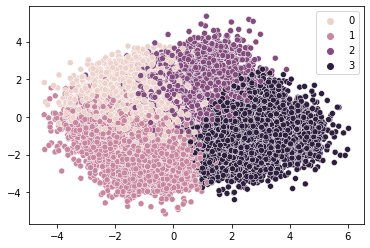

In [5]:
# pca to 2
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(data_scaled)
data_pca=pca.transform(data_scaled)
# visualize
import matplotlib.pyplot as plt
sns.scatterplot(x=data_pca[:,0],y=data_pca[:,1],hue=pred)
plt.show()


/home/studio-lab-user/.conda/envs/stat/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

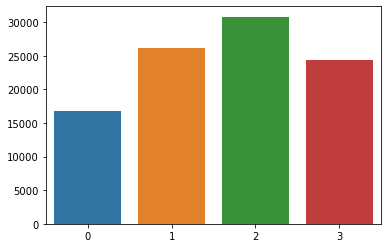

In [7]:
# count unique pred
pred_count=pd.Series(pred).value_counts()
# bar plot
sns.barplot(pred_count.index,pred_count.values)

In [8]:
submission['Predicted']=pred
submission.to_csv('data/submission.csv',index=False)

With 4 clusters score is 0.22 with 3 it was 0.17. We can find the optimal number of clusters by looking at the graph otherwise silhouette_score approach will takes forever.

In [9]:
# clusters=[ 3,5,7,9]
# scores=[]
# for i in clusters:
#     print(i)
#     kmeans=KMeans(n_clusters=i)
#     kmeans.fit(data_scaled)
#     scores.append(silhouette_score(data_scaled,kmeans.labels_))
# # plot
# plt.plot(clusters,scores)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.show()

/home/studio-lab-user/.conda/envs/stat/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

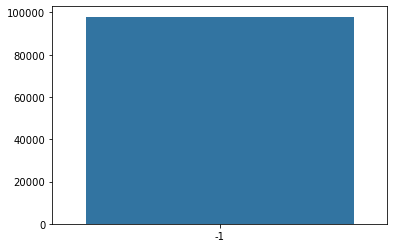

In [35]:
# # DBSCAN need improvement not finding clusters!
# from sklearn.cluster import DBSCAN
# dbscan=DBSCAN(eps=0.1, min_samples=20,n_jobs=-1)
# dbscan.fit(data)
# pred_dbscan=dbscan.labels_
# # count unique pred
# pred_count_dbscan=pd.Series(pred_dbscan).value_counts()
# # bar plot
# sns.barplot(pred_count_dbscan.index,pred_count_dbscan.values)

In [ ]:
# # guassian mixture model
# from sklearn.mixture import GaussianMixture
# bic_score={}
# for covariance in ['spherical', 'tied', 'diag', 'full']:
#     for i in range(1,12):
#         gmm=GaussianMixture(n_components=i,covariance_type=covariance)
#         gmm.fit(data_scaled)
#         bic_score[covariance,i]=gmm.bic(data_scaled)

    

In [7]:
# n_components=7 and covariance_type='full'
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=7,covariance_type='full')
gmm.fit(data_scaled)
pred_gmm=gmm.predict(data_scaled)
submission['Predicted']=pred_gmm
submission.to_csv('data/submission.csv',index=False)

The above model gives the scores of 0.50. because the data is guassian so it work best


In [3]:
# powertranform
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
pt.fit(data)
data_pt=pt.transform(data)


In [ ]:
# guassian mixture model
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=7,covariance_type='full')
gmm.fit(data_pt)
pred_gmm=gmm.predict(data_pt)
submission['Predicted']=pred_gmm
submission.to_csv('data/submission.csv',index=False)

Using PowerTransformer (that make guassian like) improve accuracy by 3 percent. Now try BayesianGaussianMixture and brute force for n components

In [ ]:
# BayesianGaussianMixture
from sklearn.mixture import BayesianGaussianMixture
bgmm=BayesianGaussianMixture(n_components=7, n_init = 5)
bgmm.fit(data_pt)
pred_bgmm=bgmm.predict(data_pt)
# pca
pca=PCA(n_components=2)
pca.fit(data_pt)
data_pca=pca.transform(data_pt)
# visualize
sns.scatterplot(x=data_pca[:,0],y=data_pca[:,1],hue=pred_bgmm)
plt.show()
submission['Predicted']=pred_bgmm
submission.to_csv('data/submission.csv',index=False)

using the above strategy we can brute force for different value and look at the pca plot to select the best value

In [6]:
submission['Predicted']=pred_bgmm
submission.to_csv('data/submission.csv',index=False)

It proves the score to 0.59 by upto 6 percent

Idea by https://www.kaggle.com/code/pourchot/simple-soft-voting